In [5]:
print("hwllo world")

hwllo world


c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 500/500 [11:49<00:00,  1.42s/it]


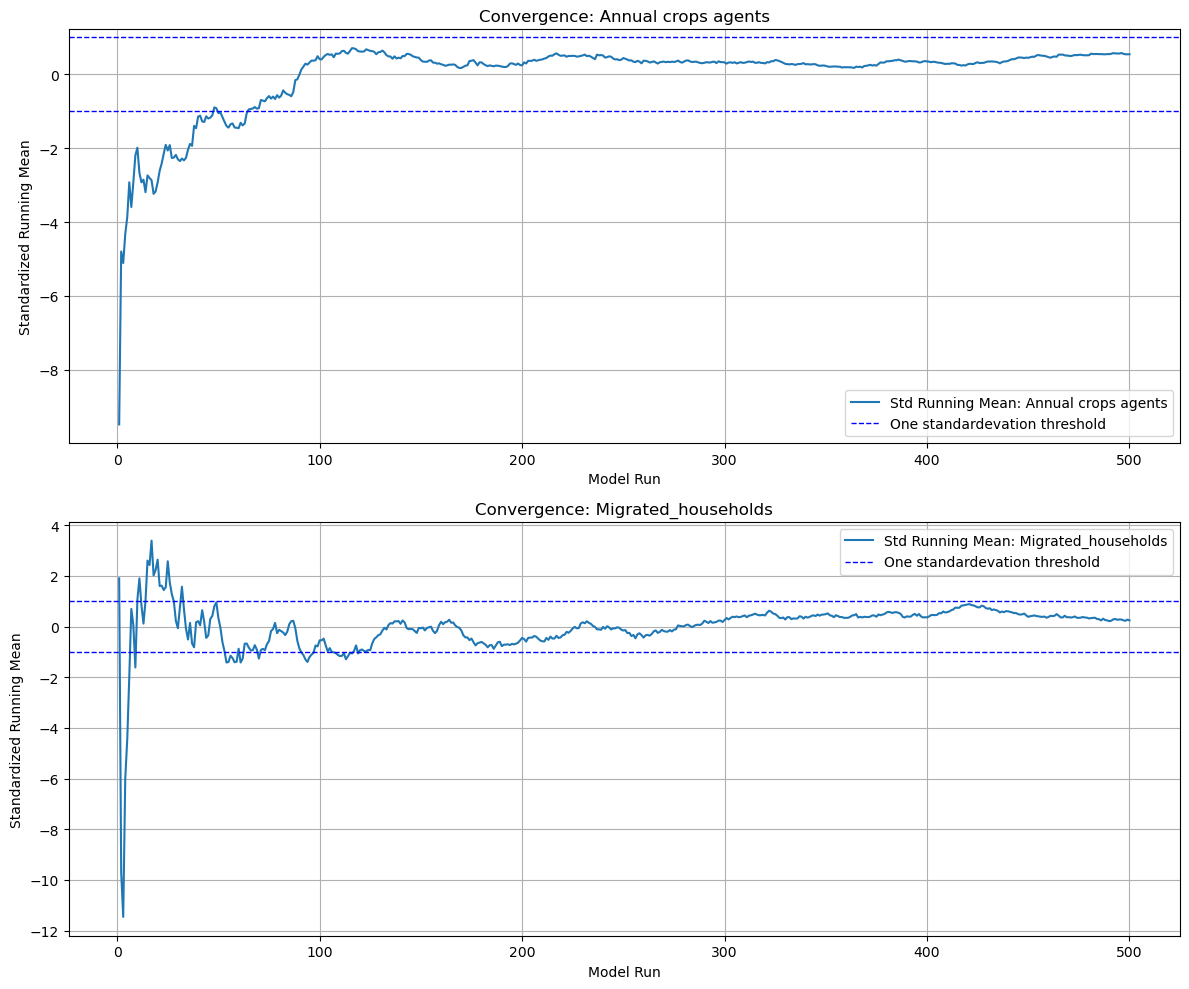

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Model3 import  RiverDeltaModel
from mesa import batch_run
params = {"num_agents":[1000]}

result_batch = batch_run(
    RiverDeltaModel,
    parameters=params,
    iterations=500,
    max_steps=300,
    number_processes= 8,
    data_collection_period=10,
    display_progress=True,
)
df = pd.DataFrame(result_batch)
df = df[df["Step"]==df["Step"].max()]
df = df.reset_index()

# List of metrics to plot
metrics = ['Annual crops agents', "Migrated_households"]

# Assume df is your DataFrame containing these metrics

# Calculate running mean and standardize for each metric
for metric in metrics:
    df[f'{metric}_running_mean'] = df[metric].expanding().mean()
    mean = df[f'{metric}_running_mean'].mean()
    std = df[f'{metric}_running_mean'].std()
    df[f'{metric}_standardized'] = (df[f'{metric}_running_mean'] - mean) / std

# Plotting on 2x2 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs = axs.flatten()

for idx, metric in enumerate(metrics):
    axs[idx].plot(df.index + 1, df[f'{metric}_standardized'], label=f'Std Running Mean: {metric}')
    # Add the 0.5 and -0.5 red reference lines with one shared label
    axs[idx].axhline(1, color="blue", linestyle="--", linewidth=1)
    axs[idx].axhline(-1, color="blue", linestyle="--", linewidth=1, label="One standardevation threshold")
    axs[idx].set_title(f'Convergence: {metric}')
    axs[idx].set_xlabel('Model Run')
    axs[idx].set_ylabel('Standardized Running Mean')
    axs[idx].grid(True)

    # Add both plot and reference line to the legend
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [3]:
df

,index,RunId,iteration,Step,num_agents,Migrated_households,Annual crops agents,Annual crops agents_running_mean,Annual crops agents_standardized,Migrated_households_running_mean,Migrated_households_standardized
0,30,6,6,300,1000,73,4,4.000000,-9.477473,73.000000,1.903225
1,61,3,3,300,1000,62,9,6.500000,-4.794721,67.500000,-9.704526
2,92,2,2,300,1000,65,6,6.333333,-5.106905,66.666667,-11.463276
3,123,5,5,300,1000,77,8,6.750000,-4.326446,69.250000,-6.011151
4,154,0,0,300,1000,73,8,7.000000,-3.858171,70.000000,-4.428276
...,...,...,...,...,...,...,...,...,...,...,...
495,15375,495,495,300,1000,71,13,9.368952,0.579114,72.229839,0.277799
496,15406,498,498,300,1000,65,4,9.358149,0.558879,72.215292,0.247098
497,15437,496,496,300,1000,68,6,9.351406,0.546249,72.206827,0.229234
498,15468,497,497,300,1000,83,9,9.350701,0.544929,72.228457,0.274883


100%|██████████| 150/150 [03:36<00:00,  1.44s/it]


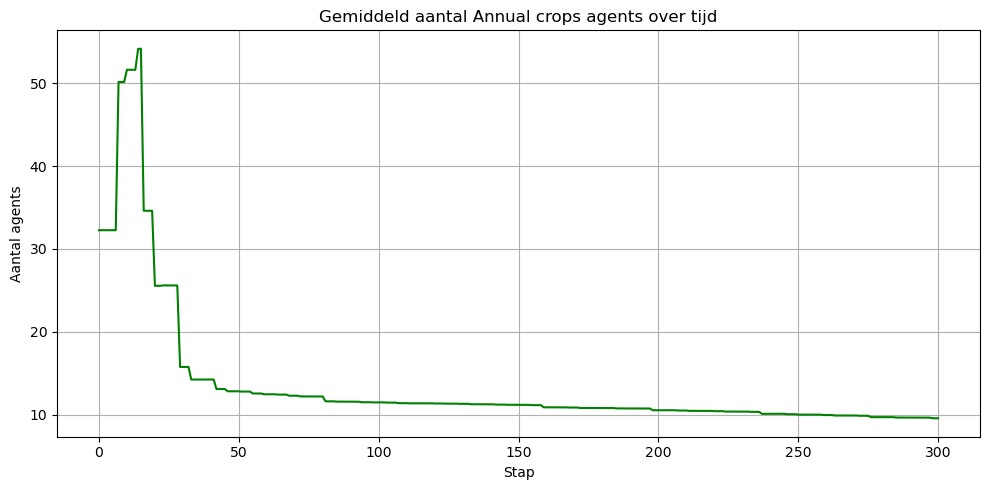

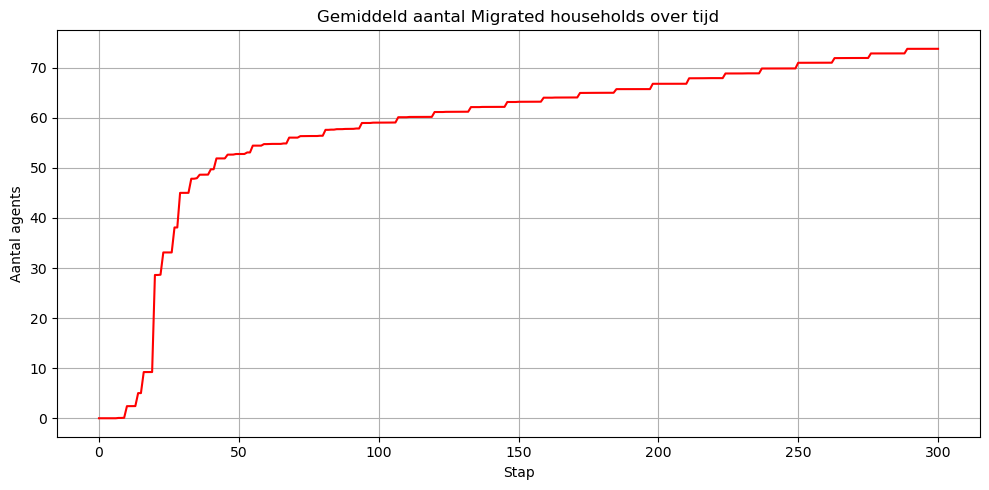

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from Model3 import RiverDeltaModel
from mesa import batch_run

# 1. Batch run uitvoeren (max 150 stappen)
params = {"num_agents": [1000]}
result_batch = batch_run(
    RiverDeltaModel,
    parameters=params,
    iterations=150,
    max_steps=300,  
    number_processes=8,
    data_collection_period=1,  # verzamel data op elke stap
    display_progress=True,
)

# 2. Gemiddelde berekenen per stap
df = pd.DataFrame(result_batch)
metrics = ['Annual crops agents', 'Migrated_households']
df_mean = df.groupby("Step")[metrics].mean().reset_index()

# 3. Plot 1: Annual crops agents over tijd
plt.figure(figsize=(10, 5))
plt.plot(df_mean['Step'], df_mean['Annual crops agents'], color='green')
plt.title('Gemiddeld aantal Annual crops agents over tijd')
plt.xlabel('Stap')
plt.ylabel('Aantal agents')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Plot 2: Migrated households over tijd
plt.figure(figsize=(10, 5))
plt.plot(df_mean['Step'], df_mean['Migrated_households'], color='red')
plt.title('Gemiddeld aantal Migrated households over tijd')
plt.xlabel('Stap')
plt.ylabel('Aantal agents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df_mean

,Step,Annual crops agents,Migrated_households
0,0,32.266667,0.000000
1,1,32.266667,0.000000
2,2,32.266667,0.000000
3,3,32.266667,0.000000
4,4,32.266667,0.000000
...,...,...,...
296,296,9.646667,73.766667
297,297,9.646667,73.766667
298,298,9.573333,73.766667
299,299,9.573333,73.766667
